In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from scripts.config import Config
from scripts.graph_processing import GraphProcessing

import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
config = Config()
graph_processing = GraphProcessing(config)

In [4]:
graph_all = graph_processing.graph_all
graph_friendly = graph_processing.graph_friendly
layout = graph_processing.layout

In [21]:
def get_edge_length(u, v, layout):
    return math.dist(layout[u], layout[v])

In [22]:
def get_weight_from_edge(u, v, attr):
    return get_edge_length(u, v, layout)

In [6]:
edge_length = {edge: get_edge_length(edge, layout) for edge in graph_all.edges}

In [7]:
graph_processing.connect_close_nodes()

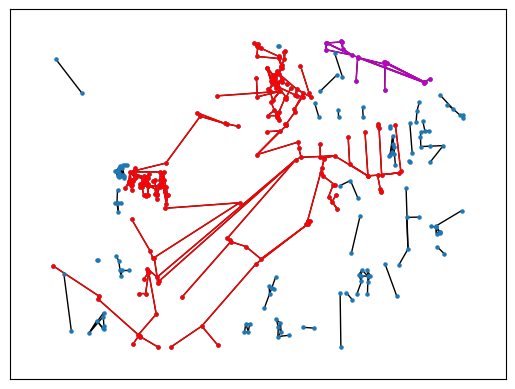

In [8]:
graph_processing.draw_graph_with_largest_groups()

In [53]:
sorted_groups = graph_processing.get_sorted_groups()
centre = graph_processing.model.data_fetcher.get_centre()
largest_groups = [sorted_groups[0], sorted_groups[1]]
largest_centres = [
    min(largest_groups[0], key=lambda n: math.dist(graph_processing.layout[n], centre)),
    min(largest_groups[1], key=lambda n: math.dist(graph_processing.layout[n], centre))
]

In [54]:
shortest_path = nx.single_source_dijkstra(graph_all, largest_centres[0], largest_centres[1], \
                                 weight=get_weight_from_edge)

In [55]:
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
path = graph_processing.trim_shortest_path(shortest_path_edges, largest_groups[0], largest_groups[1])

In [36]:
centre_point = nx.Graph()
centre_point.add_node(1, pos=centre)

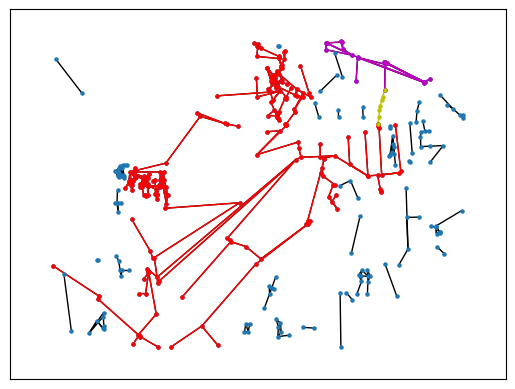

In [37]:
nx.draw_networkx(graph_friendly, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(graph_friendly.subgraph(list(largest_groups[0])), pos=layout, node_color='r', \
                 edge_color='r', with_labels=False,
                 node_size=5)
nx.draw_networkx(graph_friendly.subgraph(list(largest_groups[1])), pos=layout, node_color='m', \
                 edge_color='m', with_labels=False,
                 node_size=5)
nx.draw_networkx(nx.Graph(path), pos=layout, node_color='y', \
                 edge_color='y', with_labels=False,
                 node_size=5)
# nx.draw_networkx(centre_point, pos={1: centre}, node_color='g', node_size=5)

In [47]:
shortest_dist = float('inf')
shortest_path = []
for target in largest_groups[1]:
    distance, path = nx.multi_source_dijkstra(graph_all, largest_groups[0], target=target, weight=get_weight_from_edge)
    if distance < shortest_dist:
        shortest_dist = distance
        shortest_path = path
shortest_path

[4039207116,
 4039207003,
 4039206483,
 6954189908,
 5612209250,
 4079665991,
 1480990750]

In [51]:
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
path = graph_processing.trim_shortest_path(shortest_path_edges, largest_groups[0], largest_groups[1])

In [49]:
shortest_dist

0.0019356642157762666

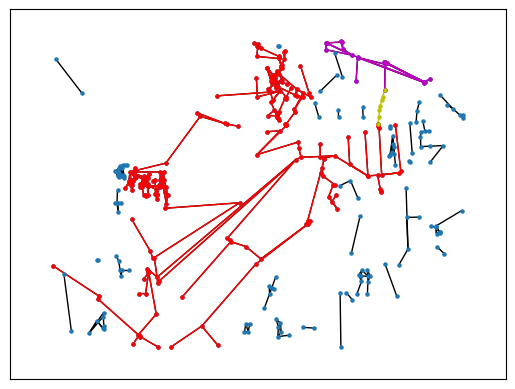

In [52]:
nx.draw_networkx(graph_friendly, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(graph_friendly.subgraph(list(largest_groups[0])), pos=layout, node_color='r', \
                 edge_color='r', with_labels=False, node_size=5)
nx.draw_networkx(graph_friendly.subgraph(list(largest_groups[1])), pos=layout, node_color='m', \
                 edge_color='m', with_labels=False, node_size=5)
nx.draw_networkx(nx.Graph(path), pos=layout, node_color='y', \
                 edge_color='y', with_labels=False, node_size=5)
# nx.draw_networkx(centre_point, pos={1: centre}, node_color='g', node_size=5)